In [2]:
# to handle data
import numpy as np
import pandas as pd

# financial data APIs
import pandas_datareader.data as web
import yfinance as yf
import gspread as gs

# to plot the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# to optimize
import scipy.optimize as sco

# to use Time Series Analysis
import statsmodels.api as sm
from statsmodels.tsa import stattools
from statsmodels.tsa.arima.model import ARIMA

# others
from datetime import datetime
import numpy_financial as npfin

# GOALS

In [345]:
fv = 1200000 # goal
t = 15 # years
pv = 15000 # initial investment
pmt = 3000 # monthly return

ror = npfin.rate(fv=-fv, pv=pv, pmt=pmt*12, nper=t)
ror

0.09934621846944465

# DATA

In [ ]:
# #get from Figma
# stock_list = ' GC=F, CITAX, AMZN,AAPL, JNJ, GM, MGK, IEF, XLG'

# #convert to list and remove whitespace
# stock_list = [stock.strip() for stock in stock_list.split(',')]

# #Define the start and end dates for historical data
# start_date = '2015-01-01'
# end_date = datetime.today().strftime('%Y-%m-%d')

# #Loop through each ticker and collect historical data
# stocks = pd.DataFrame()

# for ticker in stock_list:
#     try:
#         # Download historical data for the current ticker
#         data = yf.download(ticker, start=start_date, end=end_date)
        
#         # Add the 'Close' prices to the stocks DataFrame
#         stocks[ticker] = data['Close']
        
#         print(f"Downloaded data for {ticker}")
#     except Exception as e:
#         print(f"Error downloading data for {ticker}: {str(e)}")

In [ ]:
# Get the list of S&P 500 tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = sp500_tickers['Symbol'].tolist()[:100]
for i in ['GC=F', 'CITAX','MGK', 'IEF', 'XLG']:
    sp500_tickers.append(i) # gold, bond, etf x 3

# Define the start and end dates for historical data
start_date = '2015-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Loop through each ticker and collect historical data
stocks = pd.DataFrame()

for ticker in sp500_tickers:
    try:
        # Download historical data for the current ticker
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Add the 'Close' prices to the stocks DataFrame - ONLY STOCK WITH HIGHER RETURN OF MORE THAN 6%
        if np.log(data['Close'] / data['Close'].shift(1)).mean()*252 >= 0.06:
            stocks[ticker] = data['Close']
            print(f"Downloaded data for {ticker}")
    except Exception as e:
        print(f"Error downloading data for {ticker}: {str(e)}")

# Add Gold to the list
data = yf.download('GC=F', start=start_date, end=end_date)
stocks['Gold'] = data['Close']        

# Add bonds
data = yf.download('CITAX', start=start_date, end=end_date)
stocks['CITAX'] = data['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for AOS
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ABT
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ABBV
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ACN
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ADBE
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ADP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for AFL
[*********************100%%**********************]  1 of 1 completed
Downloaded data for A
[*********************100%%**********************


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for BIO
[*********************100%%**********************]  1 of 1 completed
Downloaded data for TECH
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for BLK
[*********************100%%**********************]  1 of 1 completed
Downloaded data for BX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for BKNG
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for BSX
[*********************100%


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2023-11-08)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for CDNS
[*********************100%%**********************]  1 of 1 completed
Downloaded data for CZR
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for CARR
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Downloaded data for CAT
[***

In [ ]:
stocks.to_csv(r'E:\Nhung\Data Analyst\Robo-advisor\Practice\mid-term.csv', index=False)

In [376]:
stocks = pd.read_csv('mid-term.csv')

## Descriptive Analysis

In [377]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AOS     917 non-null    float64
 1   ABT     917 non-null    float64
 2   ABBV    917 non-null    float64
 3   ACN     917 non-null    float64
 4   ADBE    917 non-null    float64
 5   ADP     917 non-null    float64
 6   AFL     917 non-null    float64
 7   A       917 non-null    float64
 8   APD     917 non-null    float64
 9   AKAM    917 non-null    float64
 10  ALB     917 non-null    float64
 11  ALGN    917 non-null    float64
 12  ALLE    917 non-null    float64
 13  ALL     917 non-null    float64
 14  GOOGL   917 non-null    float64
 15  GOOG    917 non-null    float64
 16  AMZN    917 non-null    float64
 17  AMD     917 non-null    float64
 18  AMT     917 non-null    float64
 19  AWK     917 non-null    float64
 20  AMP     917 non-null    float64
 21  AME     917 non-null    float64
 22  AP

In [378]:
stocks.dropna(axis=0, inplace=True)

stocks.describe()

,AOS,ABT,ABBV,ACN,ADBE,ADP,AFL,A,APD,AKAM,...,CBOE,CBRE,CDW,CE,COR,CNC,MGK,XLG,Gold,CITAX
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,...,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,62.423511,109.948244,126.423599,283.247754,460.376314,203.516510,56.361778,126.836815,273.259030,101.204231,...,116.644177,75.661210,166.268811,125.786783,134.768550,71.323206,206.561908,30.452253,1835.173826,9.663795
std,10.123586,11.760783,25.003604,47.625103,96.998265,36.126863,12.526629,22.695268,26.547226,11.751838,...,19.026512,17.902427,30.649580,25.704065,30.144728,9.519024,29.897683,3.986533,95.925864,0.603081
min,34.750000,62.820000,64.500000,143.690002,275.200012,109.070000,25.690001,63.369999,176.729996,70.750000,...,76.540001,29.830000,79.559998,62.200001,73.930000,45.549999,111.480003,17.198000,1478.599976,7.950000
25%,55.459999,102.559998,106.500000,256.940002,378.359985,175.589996,47.049999,114.989998,252.850006,92.120003,...,100.379997,67.489998,154.080002,106.260002,106.900002,64.080002,186.259995,28.062000,1770.400024,9.140000
50%,64.330002,109.199997,134.229996,285.269989,462.579987,212.529999,56.750000,127.720001,281.239990,103.010002,...,118.529999,78.349998,173.589996,122.209999,132.880005,68.610001,205.320007,30.653000,1830.500000,9.570000
75%,69.320000,118.400002,148.699997,314.799988,515.840027,230.470001,65.550003,142.080002,292.700012,110.980003,...,127.089996,86.720001,188.649994,150.009995,158.919998,78.820000,232.009995,33.828999,1914.000000,10.280000
max,85.849998,141.460007,174.960007,415.420013,688.369995,269.899994,82.230003,179.279999,325.250000,121.919998,...,174.080002,110.300003,214.250000,173.820007,196.880005,97.220001,264.329987,37.367001,2051.500000,10.610000


## Return
Find as many as possible portfolios that return at (approximaetly) required rate of return

In [379]:
# all securities return by day
log_return_1 = np.log(stocks / stocks.shift(1))
log_return = pd.DataFrame()

# define function of portolio return
def p_return(weights):
  return np.dot(log_return.mean().T,weights)*252

# define function of portolio risk
def p_std(weights):
  return np.sqrt(np.dot(weights.T, np.dot(log_return.cov().T, weights)))*252

In [380]:
# find the stocks
security = pd.DataFrame(log_return_1.mean()/log_return_1.std()).sort_values(by=0,ascending=False)[50:54].index.tolist()

for i in ['Gold', 'CITAX','MGK', 'IEF', 'XLG']:
    security.append(i) # gold, bond, etf x 3

# return of chosen assets    
for i in security:
    try:
        log_return[i] = log_return_1[i]
    except:
        continue
    
noa = len(log_return.columns)
security

['ABT', 'CNC', 'ADSK', 'BDX', 'Gold', 'CITAX', 'MGK', 'IEF', 'XLG']

In [381]:
stocks = stocks[['ABT', 'CNC', 'ADSK', 'BDX', 'Gold', 'CITAX', 'MGK', 'XLG']]

In [382]:
log_return.mean()*252

ABT      0.066293
CNC      0.080233
ADSK     0.087769
BDX      0.047406
Gold     0.078492
CITAX    0.026526
MGK      0.193424
XLG      0.177283
dtype: float64

### Required rate of return (RoR)

In [383]:
# convert each stock's return into Nx1 matrix
stock_return = np.array(log_return.mean()*252).reshape(-1,1)

# calculate required rate of return
ror = npfin.rate(fv=-fv, pv=pv, pmt=pmt*12, nper=t)

# define asset return
asset_return = np.array(log_return.mean()*252).reshape(1,-1)
asset_std = log_return.std()

### Possible portfolios
Portfolio return - RoR < 0.01%

In [384]:
# find nearest weight
## define
min_diff = 0.001
min_acceptable = ror - min_diff
max_accpetable = ror + 50*min_diff
weight = []

## generate randomly weights
for _ in range(5000):
    sample_weight_dict = {}
    for i in range(noa-1):
        w = np.random.rand()*100
        while w > 40:
            w = np.random.rand()*100
        sample_weight_dict[stocks.columns[i]] =  w
    sample_weight_dict[stocks.columns[-1]] = 100-np.sum(list(sample_weight_dict.values()))
    if sample_weight_dict[stocks.columns[-1]] >= 0:
        sample_weight = np.array([list(sample_weight_dict.values())]).reshape(-1,1)
        sample_p_return = float(np.dot(asset_return,sample_weight))/100
        if (sample_p_return >= ror) and (sample_p_return <= max_accpetable):
            weight.append(sample_weight)

print(len(weight))

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_18604\1765258589.py:19: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



177


### Optimal portfolios
Among those above, only choose the portfolio lie on EF. The idea is that EF is formed by portfolios with minimum risk (min var) for each return. 

To be clearer, each return has many many portfolios whose weights can generate that return - these are basically on the horizontal line for each return. And of course, the "efficient: portfolio is the portfolio whose minimum variance among those portfolios

`scipy.opmize,minimize` is used to find those efficient portfolios
* Method: Sequential Least Quadratic Programming
* Constraint: 
    * $\Sigma weight = 1$
    * $R_p = R_{target} $
* Boundary of each asset: $weight_i \in [0,1]$
* Minimize variance

In [385]:
## calculate return and std
sample_p_return = [p_return(weight[i]) for i in range(len(weight))]
sample_p_std = [p_std(weight[i]/10000) for i in range(len(weight))]

In [386]:
# # constraints
# ## the meaning of the first line is: Rp-Rtarget = 0 (type:eq means "=0"). Similar to the second line
# constraints = ({"type":"eq", "fun": lambda x: p_return(x)-target},
#                {"type":"eq", "fun": lambda x: np.sum(x)-1})

# # set boundary
# boundaries = tuple((0,1) for _ in range(noa))

In [387]:
# target_return = np.linspace(min(sample_p_return),max(sample_p_return),100) # there are 50 return targets
# target_std = []
# pweights = []
# x0 = np.array(noa*[1./noa])

# # find efficient portfolio for each of target return
# ## x0 assigned as follow means the first weight data entry is every asset has the same weight
# for target in target_return:
#   res = sco.minimize(p_std, x0=x0, method="SLSQP", constraints=constraints, bounds=boundaries)
#   target_std.append(res["fun"])
#   pweights.append(res["x"])

# target_std = np.array(target_std)

## Risk
Among those portfolios, choose the best fit for each risk tolerance. The idea here is that pick 5 portfolios from 100 "efficient" portfolios above *(see p2)*:
* **Level 1 - Risk averse**: minimum risk portfolio *(not necessarily be MVP - because MVP is generated by `scipy.optimize.minimize`, while 2000 samples are generated randomly)*
* **Level 2**: median of level 1 and 3
* **Level 3 - Risk neutral**: maximum $\frac{R_p}{\sigma_p}$ *(in other words, best trade-off)*
* **Level 4**: median of level 3 and 5
* **Level 5 - Risk lover**: maximum return

In [388]:
# # find the position of each level in 50 "efficient" portfolios
# lv1_index = np.argmin(target_std)
# lv3_index = np.argmax([target_return[i]/target_std[i] for i in range(len(target_return))])
# lv5_index = np.argmax(target_return)
# lv2_index = int((lv1_index+lv3_index)/2)
# lv4_index = int((lv3_index+lv5_index)/2)
# lv_index = {k:v for k,v in zip(range(1,6),[lv1_index, lv2_index, lv3_index, lv4_index, lv5_index])} # summary

# lv_index

In [389]:
# # define a function to return return, risk, weight for each level
# def optimal_portfolio(level, stock_df):
#     # find the weight
#     optimal_weight = pweights[lv_index[level]]
    
#     # print out weight for each stock
#     for stock,weight in zip(stock_df.columns, optimal_weight):
#         print(stock,':',round(weight*100, 3),'%')
    
#     # print out risk and return of the portfolio
#     print(f'Portfolio return (lv{level}): {round(p_return(optimal_weight)*100,3)}%')
#     print(f'Portfolio std (lv{level}): {round(p_std(optimal_weight),3)}')
    
#     return optimal_weight

In [390]:
# find the position of each level in 50 "efficient" portfolios
lv1_index = np.argmin(sample_p_std)
lv3_index = np.argmin([sample_p_return[i]/sample_p_std[i] for i in range(len(sample_p_return))])
lv5_index = np.argmax(sample_p_return)
lv2_index = int((lv1_index+lv3_index)/2)
lv4_index = int((lv3_index+lv5_index)/2)
lv_index = {k:v for k,v in zip(range(1,6),[lv1_index, lv2_index, lv3_index, lv4_index, lv5_index])} # summary

lv_index

{1: 129, 2: 105, 3: 81, 4: 99, 5: 117}

In [391]:
# define a function to return return, risk, weight for each level
def optimal_portfolio(level, stock_df):
    # find the weight
    optimal_weight = weight[lv_index[level]]
    
    # print out weight for each stock
    for stock,w in zip(stock_df.columns, optimal_weight):
        print(stock,':',w,'%')
    
    # print out risk and return of the portfolio
    print(f'Portfolio return (lv{level}): {sample_p_return[lv_index[level]][0]}%')
    print(f'Portfolio std (lv{level}): {sample_p_std[lv_index[level]][0][0]}')
    
    return optimal_weight

In [392]:
level = 2
w = optimal_portfolio(level,stocks)
ror*100

ABT : [5.80354095] %
CNC : [27.86260404] %
ADSK : [10.21269704] %
BDX : [2.97856463] %
Gold : [7.54624353] %
CITAX : [13.90123736] %
MGK : [24.97768657] %
XLG : [6.71742589] %
Portfolio return (lv2): 10.640996623608483%
Portfolio std (lv2): 0.029704881032406493


9.934621846944465

In [393]:
import plotly.express as px

df = pd.DataFrame(data=w, index=stocks.columns)

fig = px.pie(values=df[0], names=df.index, hole=0.4)
fig.show()

In [394]:
df

,0
ABT,5.803541
CNC,27.862604
ADSK,10.212697
BDX,2.978565
Gold,7.546244
CITAX,13.901237
MGK,24.977687
XLG,6.717426


## Prediction

In [395]:
m = pmt # monthly reserve
I = pv # initial investment

In [396]:
# # risk tolerance  type (return, variance)
# risk_dict = {}
# for level in range(1,6):
#     risk_dict[level] = (sample_p_return[lv_index[level]][0], sample_p_std[lv_index[level]][0][0])

# risk_dict

In [442]:
risk_dict = {
    1: (0.09316084288014086, 0.12883607157348542),
    2:(0.11569069844066265, 0.13819949233884793),
    3:(0.13822055400118444, 0.1558336955224367),
    4:(0.15577031326872078, 0.2131836872329948),
    5:(0.1958233898207595, 0.29248631836508465)
} # (return, variance)

In [458]:
def fix_calc_return(r):
  r_list = []
  r1 = (I+12*m)*(1+r)
  r_list.append(r1)

  for _ in range(15): # find the return for the next 15 years
    rt_1 = r_list[-1] # r(t+!)
    rt = (rt_1+12*m)*(1+r)
    r_list.append(rt)
  return r_list

In [459]:
ret, vol = risk_dict[level]
ret, vol

r_list = fix_calc_return(ret)

no_risk_assets = []
f = lambda x: (12*m)*x+I

for i in range(1,20):
  no_risk_assets.append(f(i))

In [467]:
def calc_return():
  r = np.random.normal(ret,vol) # this line is differenct from the above
  r_list = []
  r1 = (I+12*m)*(1+r)
  r_list.append(r1)

  for _ in range(15):
    rt_1 = r_list[-1]
    rt = (rt_1+12*m)*(1+r)
    r_list.append(rt)
  return r_list

In [477]:
r_res = []
for _ in range(100):
  r_list = calc_return()
  r_res.append(r_list)
  
no_risk_assets = []
f = lambda x: (12*m)*x+I
for i in range(1,17):
  no_risk_assets.append(f(i))
  
# arranging the data for seaborn
df = pd.DataFrame(r_res).melt(value_name="amount", var_name="year")

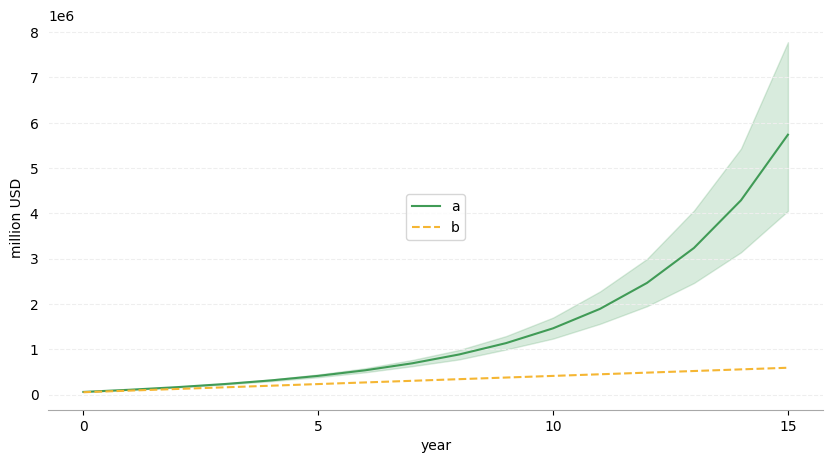

In [483]:
plt.figure(figsize=(10,5))
ax = plt.gca()

sns.lineplot(data=df, x="year", y="amount", label='a', errorbar=('ci', 80), color='#409B56')
sns.lineplot(no_risk_assets, color='#F5B633', label='b', linestyle='--')

plt.grid(color='#eeeeee', axis='y', linestyle = '--')
plt.tick_params(left = False)
plt.ylabel('million USD')
plt.xticks(ticks=[0,5,10,15])


ax.spines['left'].set_color('#ffffff')
ax.spines['top'].set_color('#ffffff')
ax.spines['bottom'].set_color('#a8a8a8')
ax.spines['right'].set_color('#ffffff')

plt.legend(loc='center')


plt.show()

In [484]:
df['amount']

0       5.438922e+04
1       6.281358e+04
2       6.838199e+04
3       5.185554e+04
4       5.656477e+04
            ...     
1595    8.882025e+05
1596    8.880884e+05
1597    2.920887e+06
1598    3.557553e+05
1599    1.108181e+06
Name: amount, Length: 1600, dtype: float64

<Axes: >

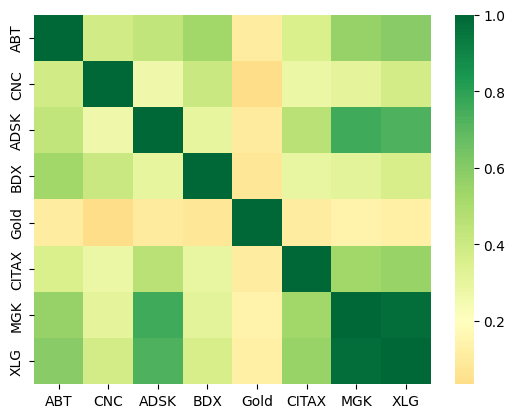

In [479]:
sns.heatmap(log_return.corr(), cmap='RdYlGn', center=0.2)